In [478]:
import pandas as pd
df = pd.read_csv("C:/Users/Dell/Downloads/laptop_price.csv", encoding="latin-1")

In [479]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


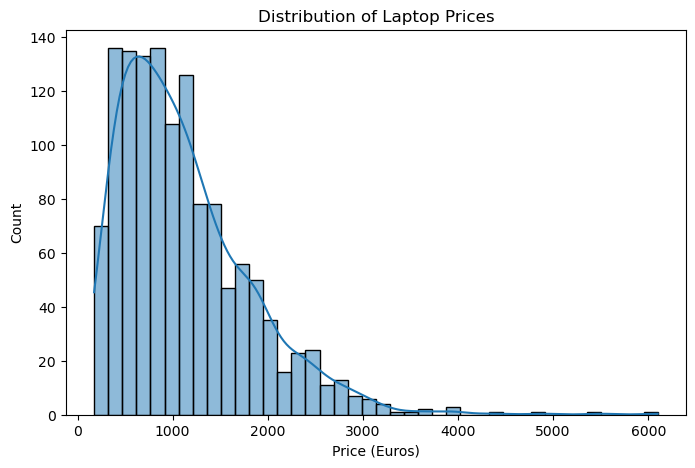

In [480]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Price
plt.figure(figsize=(8,5))
sns.histplot(df["Price_euros"], bins=40, kde=True)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price (Euros)")
plt.ylabel("Count")
plt.show()


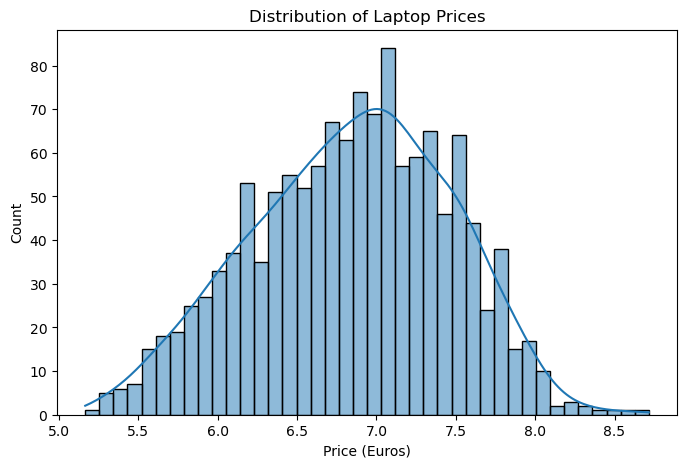

In [481]:
import numpy as np

# Apply log transformation to target
df["Price_log"] = np.log1p(df["Price_euros"])

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Price
plt.figure(figsize=(8,5))
sns.histplot(df["Price_log"], bins=40, kde=True)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price (Euros)")
plt.ylabel("Count")
plt.show()


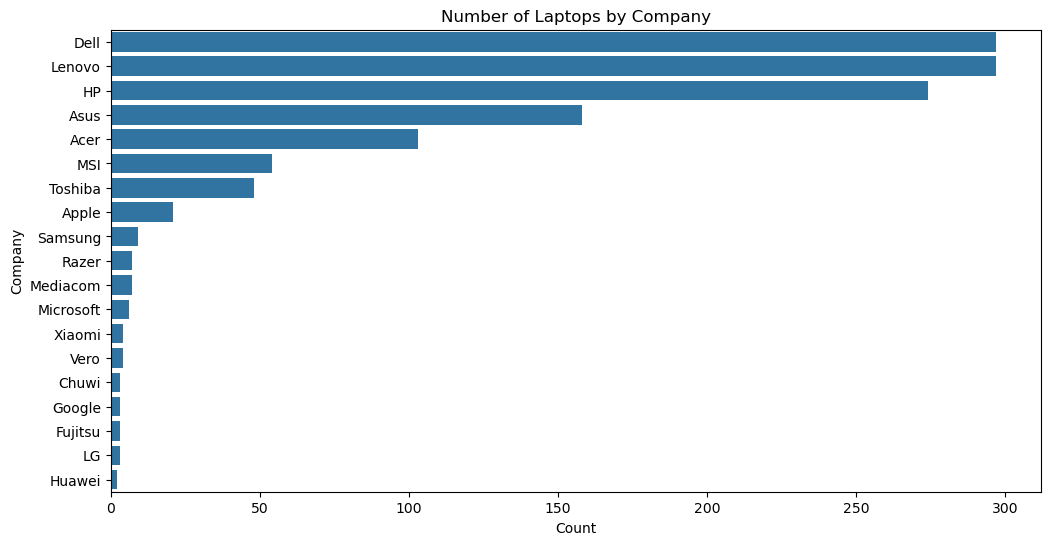

In [482]:
# Company-wise laptop count
plt.figure(figsize=(12,6))
sns.countplot(y=df["Company"], order=df["Company"].value_counts().index)
plt.title("Number of Laptops by Company")
plt.xlabel("Count")
plt.ylabel("Company")
plt.show()


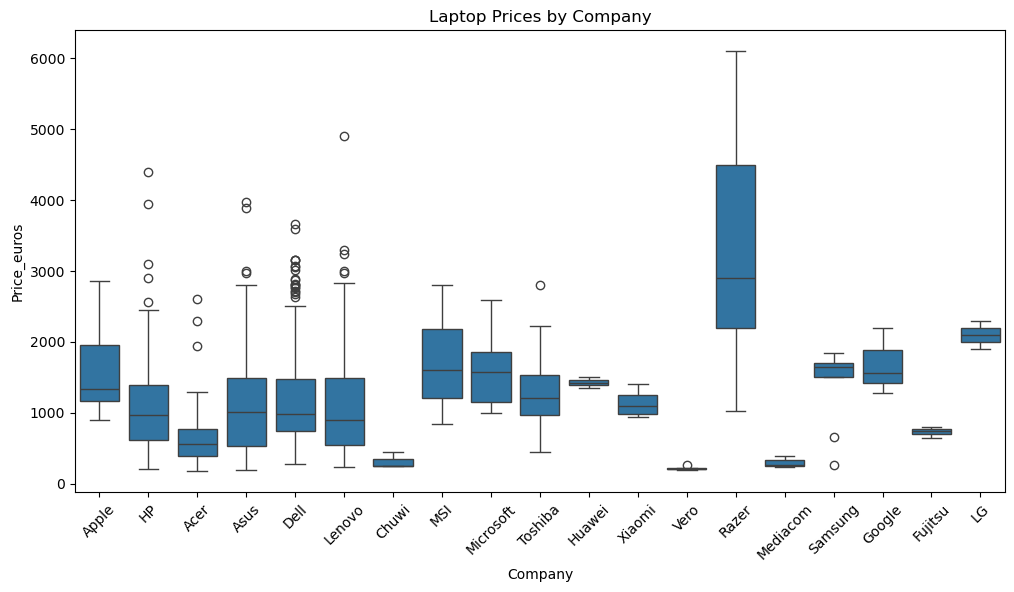

In [483]:
# Price by Company
plt.figure(figsize=(12,6))
sns.boxplot(x="Company", y="Price_euros", data=df)
plt.title("Laptop Prices by Company")
plt.xticks(rotation=45)
plt.show()


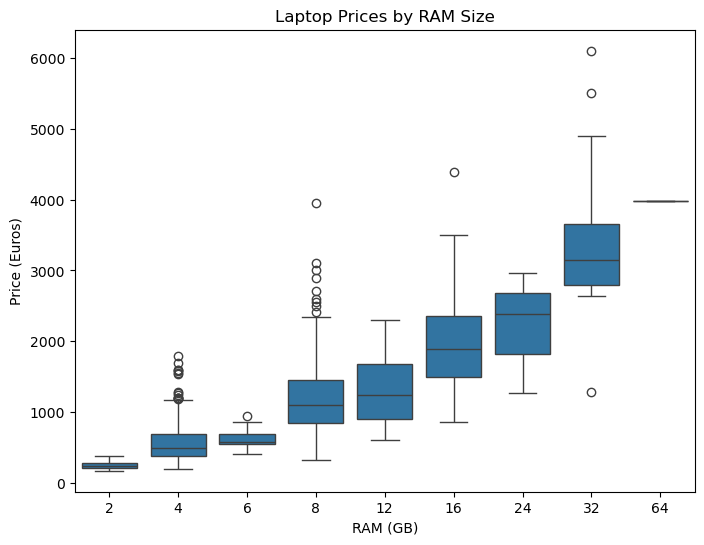

In [484]:
# Clean RAM column (remove "GB")
df["RAM"] = df["Ram"].str.replace("GB","").astype(int)

# Boxplot: Price vs RAM
plt.figure(figsize=(8,6))
sns.boxplot(x="RAM", y="Price_euros", data=df)
plt.title("Laptop Prices by RAM Size")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (Euros)")
plt.show()


In [485]:
df = df.drop("Ram", axis=1)
df = df.drop("Product", axis=1)

In [486]:
df = df.join(pd.get_dummies(df.Company, dtype="int"))
df = df.drop("Company", axis=1)

In [487]:
df = df.join(pd.get_dummies(df.TypeName, dtype="int"))
df = df.drop("TypeName", axis=1)

In [488]:
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
df["Screen Width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df["Screen Height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[1])
df = df.drop("ScreenResolution", axis = 1)


In [489]:
df["CPU Brand"] = df.Cpu.str.split(" ").apply(lambda x: x[0])
df["CPU Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])
df = df.drop("Cpu", axis = 1)

In [490]:
df["CPU Frequency"] = df["CPU Frequency"].str[:-3]
df["CPU Frequency"] = df["CPU Frequency"].astype("float")

In [491]:
df["Screen Width"] = df["Screen Width"].astype("int")
df["Screen Height"] = df["Screen Height"].astype("int")

In [492]:
df["Memory Amount"] = df["Memory"].str.split(" ").apply(lambda x: x[0])
df["Memory Type"] = df["Memory"].str.split(" ").apply(lambda x: x[1])

In [493]:
def turn_memory_into_mb(value):
    if "GB" in value:
        return float(value[:value.find("GB")])*1000
    elif "TB" in value:
        return float(value[:value.find("TB")])*1000000

In [494]:
df["Memory Amount"] = df["Memory Amount"].apply(turn_memory_into_mb)

In [495]:
df = df.join(pd.get_dummies(df["Memory Type"], dtype="int"))

In [496]:
df = df.drop("Memory", axis=1)
df = df.drop("Memory Type", axis=1)

In [497]:
df["Weight"] = df["Weight"].str[:-2].astype("float")

In [498]:
df["GPU Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])

In [499]:
df = df.drop("Gpu", axis=1)

In [500]:
df = df.join(pd.get_dummies(df["OpSys"], dtype="int"))

In [501]:
df = df.drop("OpSys", axis=1)

In [502]:
cpu_categories = pd.get_dummies(df["CPU Brand"], dtype="int")
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

In [503]:
df = df.join(cpu_categories)
df = df.drop("CPU Brand", axis=1)

In [504]:
gpu_categories = pd.get_dummies(df["GPU Brand"], dtype="int")
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

In [505]:
df = df.join(gpu_categories)
df = df.drop("GPU Brand", axis=1)

In [506]:
df

,laptop_ID,Inches,Weight,Price_euros,Price_log,RAM,Acer,Apple,Asus,Chuwi,...,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU
0,1,13.3,1.37,1339.69,7.200940,8,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1,2,13.3,1.34,898.94,6.802328,8,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,3,15.6,1.86,575.00,6.356108,8,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,15.4,1.83,2537.45,7.839309,16,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,5,13.3,1.37,1803.60,7.498094,8,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,1.80,638.00,6.459904,4,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1299,1317,13.3,1.30,1499.00,7.313220,16,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1300,1318,14.0,1.50,229.00,5.438079,2,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1301,1319,15.6,2.19,764.00,6.639876,6,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [507]:
df.dtypes

laptop_ID               int64
Inches                float64
Weight                float64
Price_euros           float64
Price_log             float64
RAM                     int32
Acer                    int32
Apple                   int32
Asus                    int32
Chuwi                   int32
Dell                    int32
Fujitsu                 int32
Google                  int32
HP                      int32
Huawei                  int32
LG                      int32
Lenovo                  int32
MSI                     int32
Mediacom                int32
Microsoft               int32
Razer                   int32
Samsung                 int32
Toshiba                 int32
Vero                    int32
Xiaomi                  int32
2 in 1 Convertible      int32
Gaming                  int32
Netbook                 int32
Notebook                int32
Ultrabook               int32
Workstation             int32
Screen Width            int32
Screen Height           int32
CPU Freque

<Axes: >

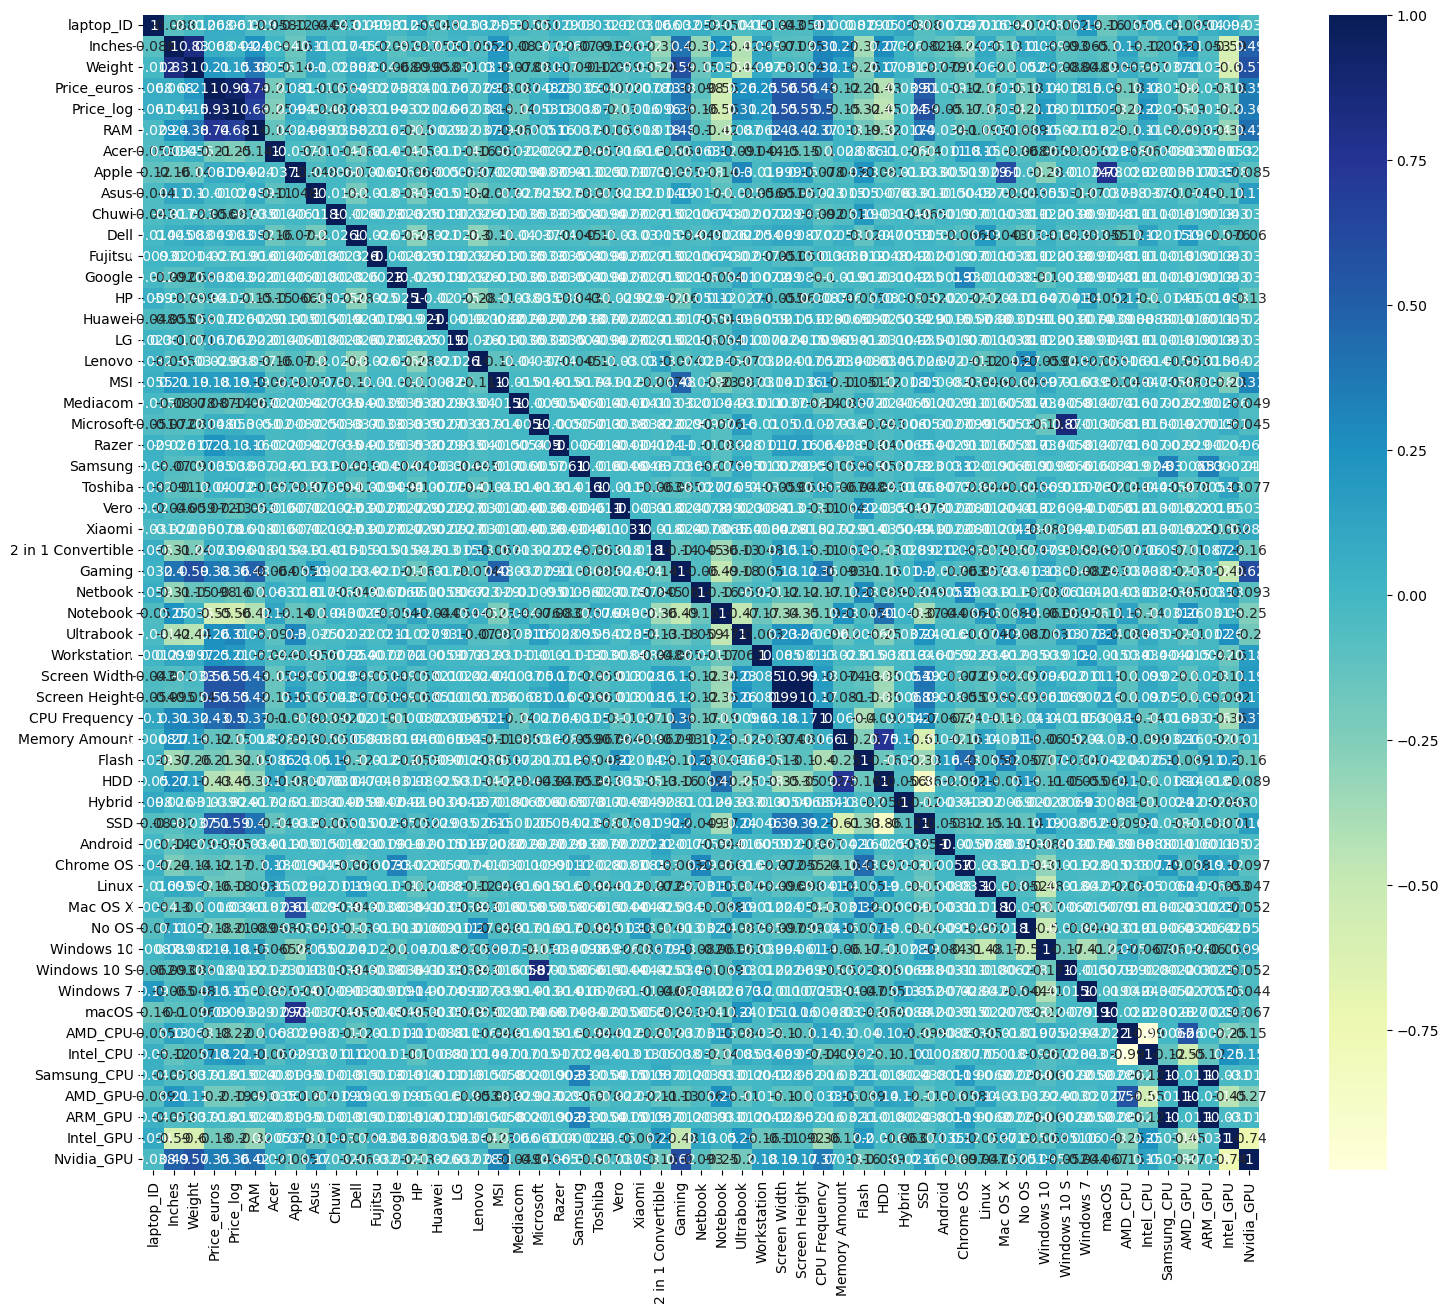

In [508]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [509]:
target_correlations = df.corr()["Price_euros"].apply(abs).sort_values(ascending=False)
target_correlations

Price_euros           1.000000
Price_log             0.927741
RAM                   0.743007
Screen Width          0.556529
Screen Height         0.552809
Notebook              0.549248
SSD                   0.513609
CPU Frequency         0.430293
HDD                   0.426121
Gaming                0.375789
Nvidia_GPU            0.348797
Ultrabook             0.255658
Workstation           0.249752
Razer                 0.233756
Flash                 0.210823
Weight                0.210370
Acer                  0.208349
AMD_GPU               0.199415
Intel_GPU             0.184205
Intel_CPU             0.181127
AMD_CPU               0.180111
MSI                   0.180100
No OS                 0.177094
Linux                 0.162060
Windows 7             0.152381
Windows 10            0.137048
Memory Amount         0.122365
Chrome OS             0.118684
Netbook               0.097572
macOS                 0.089928
Mediacom              0.087161
Apple                 0.080688
2 in 1 C

In [510]:
selected_features = target_correlations[:21].index

In [511]:
selected_features = list(selected_features)
selected_features

['Price_euros',
 'Price_log',
 'RAM',
 'Screen Width',
 'Screen Height',
 'Notebook',
 'SSD',
 'CPU Frequency',
 'HDD',
 'Gaming',
 'Nvidia_GPU',
 'Ultrabook',
 'Workstation',
 'Razer',
 'Flash',
 'Weight',
 'Acer',
 'AMD_GPU',
 'Intel_GPU',
 'Intel_CPU',
 'AMD_CPU']

In [512]:
limited_df = df[selected_features]

In [513]:
limited_df

,Price_euros,Price_log,RAM,Screen Width,Screen Height,Notebook,SSD,CPU Frequency,HDD,Gaming,...,Ultrabook,Workstation,Razer,Flash,Weight,Acer,AMD_GPU,Intel_GPU,Intel_CPU,AMD_CPU
0,1339.69,7.200940,8,2560,1600,0,1,2.3,0,0,...,1,0,0,0,1.37,0,0,1,1,0
1,898.94,6.802328,8,1440,900,0,0,1.8,0,0,...,1,0,0,1,1.34,0,0,1,1,0
2,575.00,6.356108,8,1920,1080,1,1,2.5,0,0,...,0,0,0,0,1.86,0,0,1,1,0
3,2537.45,7.839309,16,2880,1800,0,1,2.7,0,0,...,1,0,0,0,1.83,0,1,0,1,0
4,1803.60,7.498094,8,2560,1600,0,1,3.1,0,0,...,1,0,0,0,1.37,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,638.00,6.459904,4,1920,1080,0,1,2.5,0,0,...,0,0,0,0,1.80,0,0,1,1,0
1299,1499.00,7.313220,16,3200,1800,0,1,2.5,0,0,...,0,0,0,0,1.30,0,0,1,1,0
1300,229.00,5.438079,2,1366,768,1,0,1.6,0,0,...,0,0,0,1,1.50,0,0,1,1,0
1301,764.00,6.639876,6,1366,768,1,0,2.5,1,0,...,0,0,0,0,2.19,0,1,0,1,0


<Axes: >

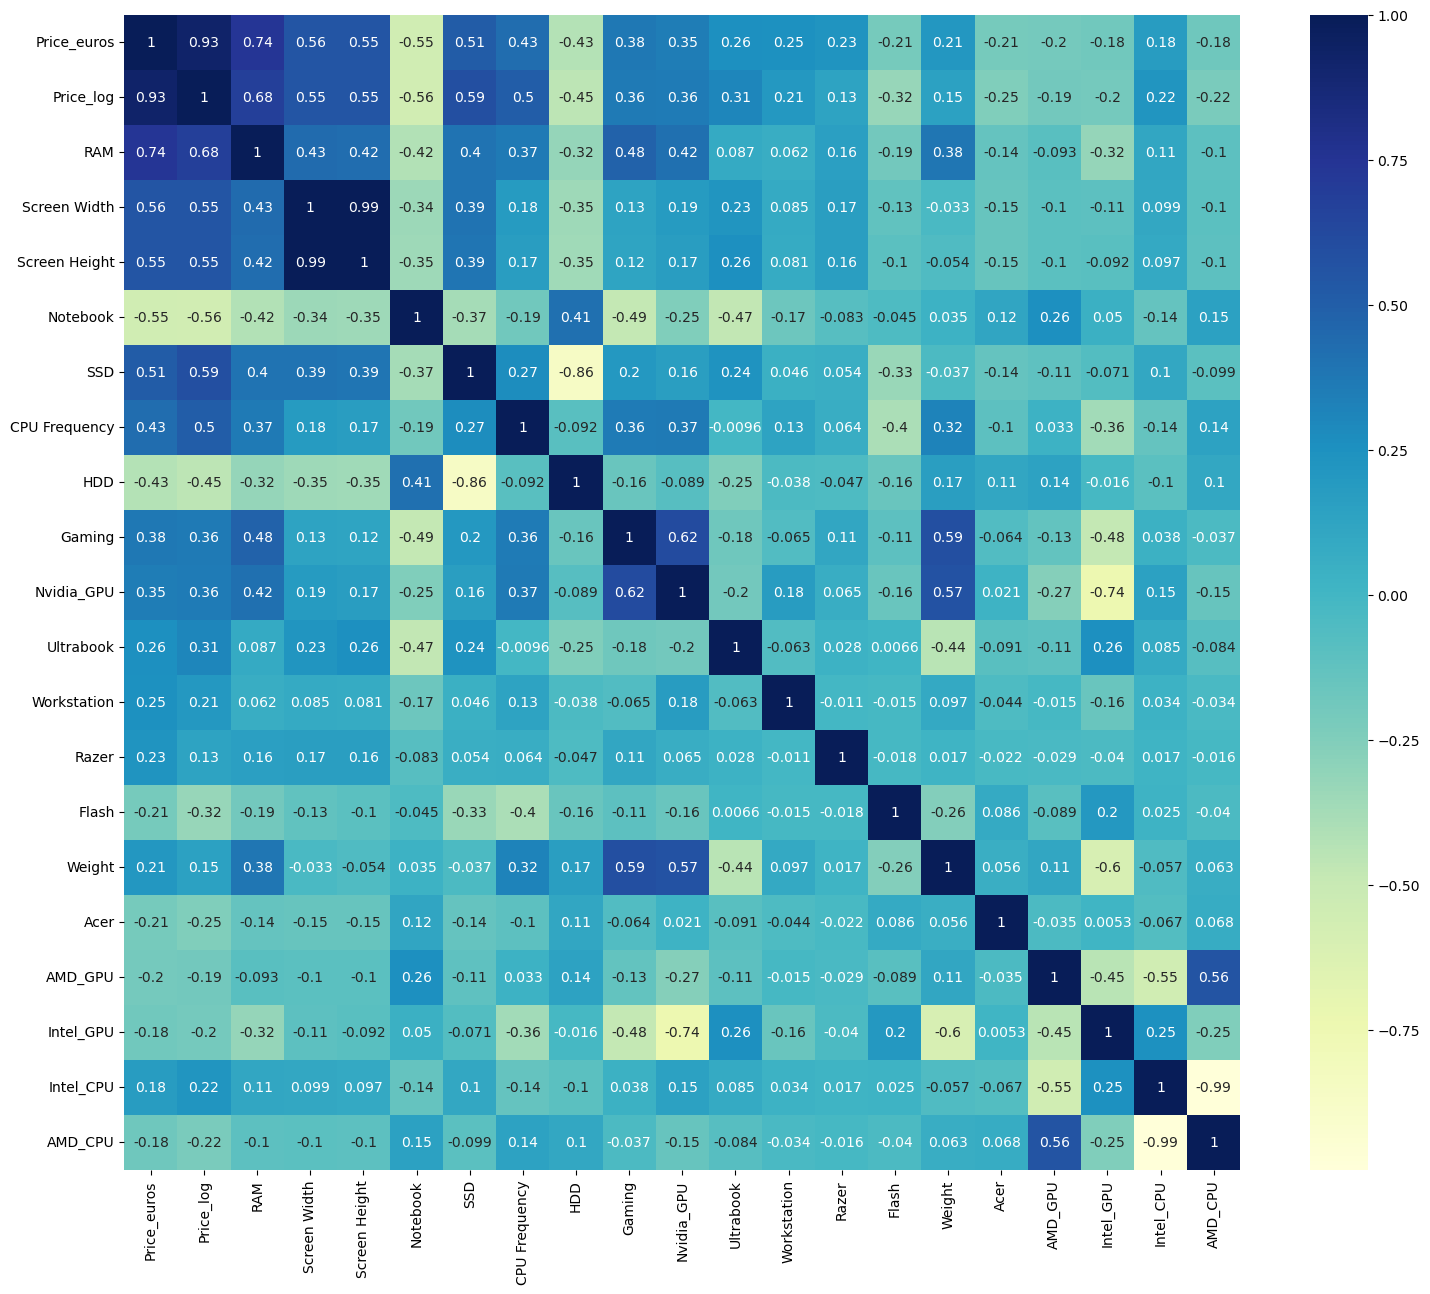

In [514]:
plt.figure(figsize=(18, 15))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

In [569]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = limited_df.drop(["Price_euros", "Price_log"], axis=1), limited_df["Price_euros"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

forest = RandomForestRegressor()

forest.fit(X_train_scaled, y_train)

forest.score(X_test_scaled, y_test)

0.827306172281439

In [570]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred_forest = forest.predict(X_test_scaled)

# Evaluation metrics
print("RandomForest R²:", r2_score(y_test, y_pred_forest))
print("RandomForest MAE:", mean_absolute_error(y_test, y_pred_forest))
print("RandomForest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_forest)))


RandomForest R²: 0.827306172281439
RandomForest MAE: 196.31255982853105
RandomForest RMSE: 313.90322020682294


In [571]:
from sklearn.linear_model import LinearRegression

X2, y2 = limited_df.drop(["Price_euros", "Price_log"], axis=1), limited_df["Price_log"]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.15, random_state=42)

scaler = StandardScaler()
X_train_2_scaled = scaler.fit_transform(X_train_2)
X_test_2_scaled = scaler.transform(X_test_2)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2_scaled, y_train_2)
y_pred_lr = lin_reg.predict(X_test_2_scaled)

print("Linear Regression R²:", r2_score(y_test_2, y_pred_lr))
print("Linear Regression MAE:", mean_absolute_error(np.expm1(y_test_2), np.expm1(y_pred_lr)))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(np.expm1(y_test_2), np.expm1(y_pred_lr))))


Linear Regression R²: 0.7897220665278185
Linear Regression MAE: 244.76946270657618
Linear Regression RMSE: 357.7920498677658


In [572]:
from sklearn.linear_model import Ridge, Lasso

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_2_scaled, y_train_2)
y_pred_log = ridge.predict(X_test_2_scaled)
y_pred_ridge = np.expm1(y_pred_log)   # back to original scale
y_true = np.expm1(y_test_2)

print("Ridge R²:", r2_score(y_true, y_pred_ridge))
print("Ridge MAE:", mean_absolute_error(y_true, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_true, y_pred_ridge)))

# Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_2_scaled, y_train_2)
y_pred_lasso = lasso.predict(X_test_2_scaled)

print("Lasso R²:", r2_score(y_test_2, y_pred_lasso))
print("Lasso MAE:", mean_absolute_error(np.expm1(y_test_2), np.expm1(y_pred_lasso)))
print("Lasso RMSE:", np.sqrt(mean_squared_error(np.expm1(y_test_2), np.expm1(y_pred_lasso))))


Ridge R²: 0.776053166626306
Ridge MAE: 244.2295319202055
Ridge RMSE: 357.4619548708854
Lasso R²: 0.7918330419930139
Lasso MAE: 242.49109573159868
Lasso RMSE: 356.9314888859305


In [573]:
results = pd.DataFrame({
    "Model": ["RandomForest", "Linear Regression", "Ridge", "Lasso"],
    "R²": [
        r2_score(y_test, y_pred_forest),
        r2_score(y_test_2, y_pred_lr),
        r2_score(y_true, y_pred_ridge),
        r2_score(y_test_2, y_pred_lasso)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_forest)),
        np.sqrt(mean_squared_error(np.expm1(y_test_2), np.expm1(y_pred_lr))),
        np.sqrt(mean_squared_error(y_true, y_pred_ridge)),
        np.sqrt(mean_squared_error(np.expm1(y_test_2), np.expm1(y_pred_lasso)))
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_forest),
        mean_absolute_error(np.expm1(y_test_2), np.expm1(y_pred_lr)),
        mean_absolute_error(y_true, y_pred_ridge),
        mean_absolute_error(np.expm1(y_test_2), np.expm1(y_pred_lasso))
    ]
})

print(results)


               Model        R²        RMSE         MAE
0       RandomForest  0.827306  313.903220  196.312560
1  Linear Regression  0.789722  357.792050  244.769463
2              Ridge  0.776053  357.461955  244.229532
3              Lasso  0.791833  356.931489  242.491096


In [574]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define alpha values to test
ridge_params = {"alpha": [0.01, 0.1, 1, 10, 50, 100, 200, 500]}

ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring="r2")
ridge_grid.fit(X_train_2_scaled, y_train_2)

print("Best Ridge alpha:", ridge_grid.best_params_)
print("Best Ridge CV R²:", ridge_grid.best_score_)

# Evaluate on test set
y_pred_ridge = ridge_grid.best_estimator_.predict(X_test_2_scaled)
print("Ridge Test R²:", r2_score(y_test_2, y_pred_ridge))
print("Ridge Test RMSE:", np.sqrt(mean_squared_error(np.expm1(y_test_2), np.expm1(y_pred_ridge))))
print("Ridge Test MAE:", mean_absolute_error(np.expm1(y_test_2), np.expm1(y_pred_ridge)))


Best Ridge alpha: {'alpha': 50}
Best Ridge CV R²: 0.7527371164174218
Ridge Test R²: 0.7924536505889386
Ridge Test RMSE: 353.6811574834395
Ridge Test MAE: 242.3708403195917


In [575]:
from sklearn.linear_model import Lasso

# Define alpha values to test
lasso_params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}

lasso = Lasso(max_iter=5000)  # increase max_iter for stability
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring="r2")
lasso_grid.fit(X_train_2_scaled, y_train_2)

print("Best Lasso alpha:", lasso_grid.best_params_)
print("Best Lasso CV R²:", lasso_grid.best_score_)

# Evaluate on test set
y_pred_lasso = lasso_grid.best_estimator_.predict(X_test_2_scaled)
print("Lasso Test R²:", r2_score(y_test_2, y_pred_lasso))
print("Lasso Test RMSE:", np.sqrt(mean_squared_error(np.expm1(y_test_2), np.expm1(y_pred_lasso))))
print("Lasso Test MAE:", mean_absolute_error(np.expm1(y_test_2), np.expm1(y_pred_lasso)))


Best Lasso alpha: {'alpha': 0.01}
Best Lasso CV R²: 0.7539331111390581
Lasso Test R²: 0.793201167716441
Lasso Test RMSE: 354.33612519227745
Lasso Test MAE: 241.86705751000534


In [576]:
results = pd.DataFrame({
    "Model": ["RandomForest", "Linear Regression", "Ridge (Tuned)", "Lasso (Tuned)"],
    "R²": [
        r2_score(y_test, y_pred_forest),
        r2_score(y_test_2, y_pred_lr),
        r2_score(y_test_2, y_pred_ridge),
        r2_score(y_test_2, y_pred_lasso)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_forest)),
        np.sqrt(mean_squared_error(np.expm1(y_test_2), np.expm1(y_pred_lr))),
        np.sqrt(mean_squared_error(np.expm1(y_test_2), np.expm1(y_pred_ridge))),
        np.sqrt(mean_squared_error(np.expm1(y_test_2), np.expm1(y_pred_lasso)))
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_forest),
        mean_absolute_error(np.expm1(y_test_2), np.expm1(y_pred_lr)),
        mean_absolute_error(np.expm1(y_test_2), np.expm1(y_pred_ridge)),
        mean_absolute_error(np.expm1(y_test_2), np.expm1(y_pred_lasso))
    ]
})

print(results)


               Model        R²        RMSE         MAE
0       RandomForest  0.827306  313.903220  196.312560
1  Linear Regression  0.789722  357.792050  244.769463
2      Ridge (Tuned)  0.792454  353.681157  242.370840
3      Lasso (Tuned)  0.793201  354.336125  241.867058
